# Árboles de decisión
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este notebook tomaremos como referencia el material del brillante Aurelien Geron resumido por Akranz que explica como entrenar, validar y realizar predicciones con árboles de decisión tomando como base el dataset de clasificación de flores iris con la librería **Scikit-learn**.

El dataset es original de UCI ML repository.
<br>Link: https://archive.ics.uci.edu/ml/datasets/iris

Luego revisaremos el algoritmo de entrenamiento CART utilizado por `Scikit-Learn`, veremos cómo regularizar árboles y usarlos en tareas de regresión. Finalmente, analizaremos algunas de las limitaciones de los árboles de decisión.


¿Qué son los Árboles de Decisión?

Son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones. Es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning y pueden realizar tareas de clasificación o regresión. La comprensión de su funcionamiento suele ser simple y a la vez muy potente.

Principales características de los árboles de decision:
* Clasifica mediane el valor de los atributos
* Es una técnica de clasificación muy extendida
* Es fácilmente entendible por personas no expertas
* También pueden utilizarse en técnicas de regresión como herramienta de predicción numérica para estimar valores reales (por ejemplo: ventas al mes, coste de compra de un vehículo...)


Más info:
* [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Kaggle](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)



## 1. Importación de paquetes y dataset

Para entender los árboles de decisión, comencemos por construir uno y consultar sus predicciones:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()

## 2. División del dataset

In [ ]:
X = iris.data[:, 2:]  # Petal length and width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

## 3. Creación del modelo de Árboles de decisión

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)

## 4. Entrenamiento

In [ ]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## 5. Visualización del árbol de decisión

Podemos visualizar el árbol de decisiones utilizando el método export_graphiz() para exportar un archivo de representación gráfica y luego transformarlo a png:

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(tree_clf, 
                out_file='./img/iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Convertimos el archivo gráfico en un archivo .png:

In [ ]:
! dot -Tpng ./img/iris_tree.dot -o ./img/iris_tree.png

zsh:1: command not found: dot


Y este es el resultado:

![Resultado](img/iris_tree.png)

## 8. Realización de predicciones

Para clasificar un nuevo punto de datos, comenzamos en el nodo raíz del gráfico (en la parte superior) y respondemos las preguntas binarias hasta que llegamos a una hoja final. Esa última hoja representa la clase a la cuál se corresponde.
Una de las cualidades de los árboles de decisión es que requieren muy poca preparación de datos. De hecho, no requieren escalado o normalizado de las características.
Un nodo de árbol tiene los siguientes atributos:

* samples (muestras): cuenta cuántas instancias de entrenamiento están sentadas en el nodo.
* value (valor): nos dice cuántas instancias de cada clase están configuradas en el nodo.
* gini: mide la impureza de los nodos (nodo puro == 0)

La siguiente ecuación muestra cómo el algoritmo de entrenamiento calcula el índice o puntuación Gini del i-ésimo nodo:

$$G_i=1-\sum_{k=1}^n{p_{i,k}}^2$$

Donde $p_{i,k}$ es la proporción o ratio de instancias de clase $k$ entre las instancias de entrenamiento en ese nodo en particular. En nuestro caso: $k \in \{1,2,3\}$.

`Scikit-learn` usa el algoritmo CART, que produce solo árboles binarios. Los nodos que no son hojas solo tienen dos hijos. Sin embargo, otros algoritmos como ID3 pueden producir árboles de decisión con nodos que tienen más de 2 hijos.

La siguiente figura muestra los límites de decisión de nuestro árbol de decisión (los árboles de decisión tienden a crear líneas/rectángulos/cuadros/.. y dividen el espacio de características de forma lineal pero iterativamente):
 
![Boundaries](img/decision_tree_boundaries.png)

En general, los árboles de decisión son intuitivos y sus predicciones son fácilmente interpretables. Estos tipos de modelos se denominan modelos de **caja blanca**. Por contra, los RandomForest  y las redes neuronales generalmente se consideran modelos de caja negra.

### 8.1. Estimando las probabilidades de pertenencia a cada clase

Un árbol de decisión también puede estimar la probabilidad de que cierta instancia pertenezca a cierta clase. Simplemente devuelve el ratio o proporción de esa clase sobre la suma de todas las instancias en la hoja.

Podemos comprobarlo con el método predict_proba de scikit-learn:

En este ejemplo, si indicamos que la longitud del pétalo es 5 y el ancho es 1.5, la probabilidad de ser de clase 0 será 0, de clase 1 0.9 y de clase 2 0.09

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])


Nota: obtendremos la misma probabilidad siempre que estemos en un mismo cuadro asignado a la hoja. No importa si nuestro nuevo punto de datos se acerca a los márgenes de decisión (decision boundaries).

## Ejercicio: Titanic

Toma como base el dataset de pasajeros del Titanic (https://www.kaggle.com/c/titanic/data) y crea un modelo de árbol de decisión para estimar las predicciones de superviviencia de dichos pasajeros.

Link de referencia adicional: https://medium.com/@merijoanna/learn-decision-trees-with-kaggle-example-cc03b1dbc6fa


## Índice GINI

El índice Gini es el nombre de la función de coste utilizada para evaluar las divisiones en el conjunto de datos.

Una división en el conjunto de datos implica un atributo de entrada y un valor para ese atributo. Se puede utilizar para dividir los patrones de entrenamiento en dos grupos de filas.

La puntuación Gini da una idea de cuán buena es una división por cuán mezcladas están las clases en los dos grupos creados por la división. Una separación perfecta da como resultado una puntuación Gini de 0, mientras que la división en el peor de los casos que da como resultado 50/50 clases en cada grupo da como resultado una puntuación de Gini de 0,5 (para un problema de 2 clases).

## Regularización con hiperparámetros

**Los árboles de decisión hacen muy pocas suposiciones sobre los datos de entrenamiento**. Si no se restringe, un árbol de decisión se adaptará para ajustarse perfectamente a los datos de entrenamiento, lo que naturalmente conduce al sobreajuste (iverfitting).

Dicho modelo a menudo se denomina modelo no paramétrico porque la cantidad de parámetros no se determina antes del entrenamiento.

Al menos podemos restringir la profundidad máxima del árbol de decisión, entre otros hiperparámetros de regularización:

* min_samples_split: el número mínimo de muestras que debe tener un nodo para que se divida.
* min_samples_leaf: El número mínimo de muestras que debe tener una hoja.
* min_weight_fraction_leaf: mean_samples_leaf como una fracción.
* max_leaf_nodes: el número máximo de nodos hoja.
* max_features: el número máximo de características que se evalúan para cualquier división.

La siguiente figura muestra dos árboles de decisión entrenados en el mismo conjunto de datos, el de la izquierda representa un árbol de decisión entrenado sin restricciones y el de la derecha se regulariza mediante el hiperparámetro min_samples_leaf: 

![RegularizedTree](img/regularized_tree.png)

## Ejemplo de Arboles de Decisión para Regresión

Los árboles de decisión también son capaces de realizar tareas de regresión.

## Inestabilidad

Los árboles de decisión tienen algunas limitaciones:

* Los árboles de decisión prefieren los límites de decisión ortogonales, lo que los hace sensibles a la rotación del conjunto de entrenamiento. Una forma de limitar este problema es usar PCA (Análisis de Componentes Principales) que a menudo da como resultado una mejor orientación de los datos de entrenamiento.
* Los árboles de decisión son sensibles a pequeñas variaciones en los datos de entrenamiento. De hecho, debido a que scikit-learn usa optimización estocástica, es posible que obtenga diferentes modelos para el mismo conjunto de datos de entrenamiento.

Random Forests puede resolver este problema promediando la predicción entrante de muchos árboles de decisión. 


## Complejidad computational

Hacer una predicción requiere que vayamos desde la raíz hasta la última hoja.

Los árboles de decisión están aproximadamente equilibrados, por lo que atravesar el árbol de decisión requiere recorrer aproximadamente $O(log_{2}(m))$. Dado que cada nodo requiere verificar el valor de una sola característica, el tiempo de ejecución de la inferencia general es $O(log_{2}(m))$. Lo que hace que el algoritmo sea independiente del número de características. Por lo tanto, las predicciones son realmente rápidas, incluso cuando el algoritmo se ocupa de una gran cantidad de características.

El algoritmo de entrenamiento compara todas las características (excepto si se establece `max_features`) en todas las muestras en cada nodo, lo que da como resultado una complejidad de entrenamiento de $O(n \times mlog_2(m))$.

Para conjuntos de entrenamiento pequeños (menos de unos pocos miles), scikit-learn puede acelerar el entrenamiento mediante la clasificación previa de los datos. 

## EXTRA: The CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train decision trees (also called "growing" trees). The algorithm works by first splitting the training set by feature $k$ and threshold $t_k$.

It chooses $k$ and $t_k$ by searching for the $(k,t_k)$ that produce the purest subsets weighted by their size.

The following figure gives the loss function that CART tries to minimize:

$$J(k,t_k)=\frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

Where:
- $G_{left/right}$ measures the resulted impurity in the left/right subsets.
- $m_{left/right}$ correspond to the number of instances in the left/right subsets.

Once the CART algorithm successfully split the initial training data into two subsets, it does the same thing to both subsets. It stops recursing once it reaches the maximum allowed tree depth (the `max_depth` hyper-parameter), or if it cannot find a split that reduces impurity.

Other hyper-parameters that control stopping include: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`.

The CART algorithm is greedy in the sense that it doesn't care if its current split will lead to an optimal downstream leaf. It only cares about finding the best possible split at the current leaf. In that sense, it doesn't necessarily result in an optimal solution.

Unfortunately, finding the optimal tree is known to be an **NP-Complete** problem with a complexity of $O(exp(m))$.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# First we want to generate a noisy quadratic dataset
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50.

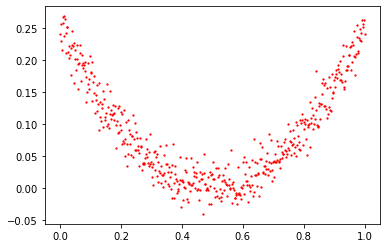

In [ ]:
plt.scatter(X, y, s=1.5, c='red')

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [ ]:
tree_reg.fit(X[..., None], y[..., None])

DecisionTreeRegressor(max_depth=2)

Si comprobamos el árbol resultante:

In [ ]:
export_graphviz(tree_reg, 
                out_file='./img/reg_tree.dot',
                feature_names=['X'],
                class_names=['y'],
                rounded=True,
                filled=True)

In [ ]:
! dot -Tpng ./img/reg_tree.dot -o ./img/reg_tree.png

zsh:1: command not found: dot


![RegressionTree](img/reg_tree.png)

Este árbol se parece mucho al árbol de clasificación que creamos anteriormente. La principal diferencia es que en lugar de predecir una clase para cada nodo, predice un valor. La predicción representa el valor objetivo promedio para el grupo en la hoja.

A medida que aumentamos el hiperparámetro `max_ depth`, proporcionamos más flexibilidad al árbol de regresión, a continuación se muestran las predicciones del árbol en rojo: 

![RegressionTrees](img/regression_trees.png)

El algoritmo CART funciona casi igual que antes, pero en lugar de buscar una división que minimice la impureza, busca una división que produzca muestras equilibradas por hoja y minimice $MSE$.

Mostramos la función de coste que el algoritmo intenta minimizar: 

$$J(k,t_k)=\frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right} \\ MSE=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}_{i}-y_{i})^{2}$$

Al igual que la clasificación, los árboles de regresión son propensos a sobreajustar los datos de entrenamiento, sin ninguna regularización, terminamos con el gráfico de la izquierda y al configurar `min_samples_leaf=10` se produce un modelo mucho más razonable: 

![Regularizing](img/regularizing_trees.png)

---